In [18]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import uniform
import matplotlib.pyplot as plt
import tqdm.notebook as tqdm

In [19]:
def plot(title, y, y1=None, x=None, label1=None, label2=None, xlabel=None, ylabel=None):
    if x is None:
        x = [i for i in range(len(y))]
        
    fig = plt.figure()
    plt.figure(figsize=(16,6), dpi= 80)
    plt.title(title, fontsize=17)

    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)
    plt.grid(axis='both', alpha=.3)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.plot(x, y, color='tab:red',label=label1);
    if y1 is not None:
        plt.plot(x, y1, color='tab:purple',label=label2)
    plt.legend()
    plt.show();


# 1 задание

<Figure size 432x288 with 0 Axes>

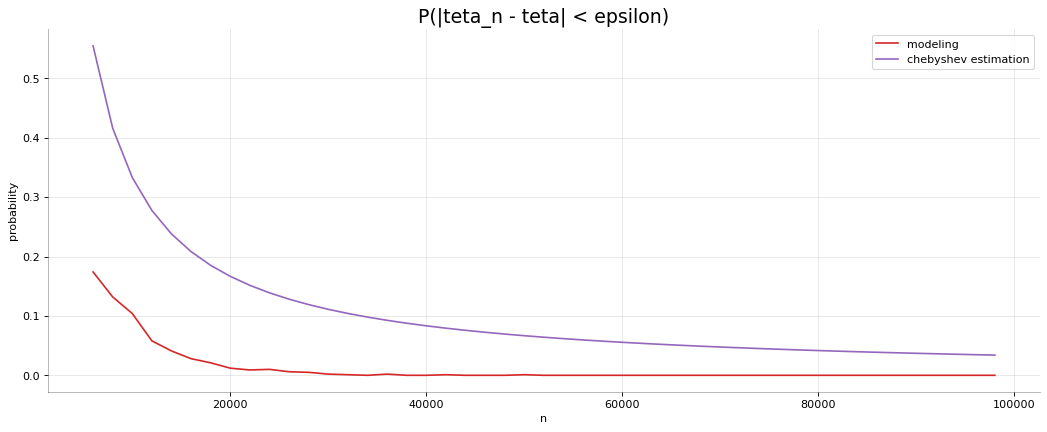

In [20]:
epsilon = 0.1 # В определении сходимости по вероятности
teta = 10 # параметр равномерного распределения
n = 100000 # num_saples
k = 1000 
prob = []
cheb = []

for i in tqdm.tqdm(range(10, n, n // 50)):
    # Создадим данные
    samples = teta * uniform.rvs(size=(k, i))
    teta_n = 2 * samples.mean(axis=1)
    
    # Оценим вероятность частотой
    prob.append((abs(teta_n - teta) > epsilon).mean())
    
    # Добавим оценку неравенством Чебышева
    cheb.append(teta ** 2 / 3 / i / epsilon ** 2)
    

plot("P(|teta_n - teta| < epsilon)", prob[3:], cheb[3:], 
     x = list(range(10, n, n // 50))[3:], label1="modeling", 
     label2="chebyshev estimation", xlabel="n", ylabel="probability");

# 2 задание

In [28]:
from scipy.stats import norm, binom

def confidence_interval(X, gamma, m = None):
    if m is None:
        # Посчитаем m с помощью метода моментов
        m = X.mean() / (1 - X.var() / X.mean())
        
    freq = X.mean() / m
    border = norm.ppf((1 + gamma) / 2) * np.sqrt(freq * (1 - freq)) / np.sqrt(len(X) * m)
    return freq - border, freq + border

# Сгенерируем выборку
m, p = 1000, 0.3
gamma = 0.95
n = 100
num_samples = 1000
X = binom(m, p).rvs(n)

# Считаем частоту попадания в доверительный интервал
count = 0
for i in tqdm.tqdm(range(num_samples)):
    X = binom(m, p).rvs(n)
    left, right = confidence_interval(X, gamma, m)
    if left <= p <= right:
        count += 1

print(f"Частота того, что p в интервале - {count / num_samples}")


Частота того, что p в интервале - 0.952


<Figure size 432x288 with 0 Axes>

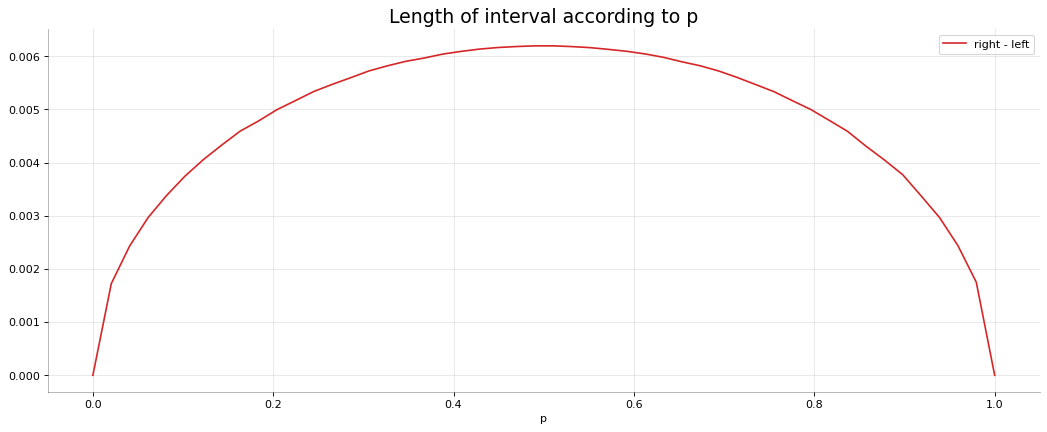

In [22]:
# Cмотрим на длину доверительного интервала при разных p
all_p = np.linspace(0, 1)
lengths = []
for p in all_p:
    X = binom(m, p).rvs(n)
    left, right = confidence_interval(X, gamma, m)
    lengths.append(right - left)
    
plot(f"Length of interval according to p", y = lengths, x = all_p, xlabel="p", label1="right - left")

# 3 задание

In [23]:
from scipy.stats import expon

In [24]:
def ecdf(data):
    """ Compute Empirical CDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    function = lambda t: np.searchsorted(x, t, side='right') / n
    return function

def cdf(x):
    """ Theoretical CDF """
    return np.exp(-np.exp(-x))

<Figure size 432x288 with 0 Axes>

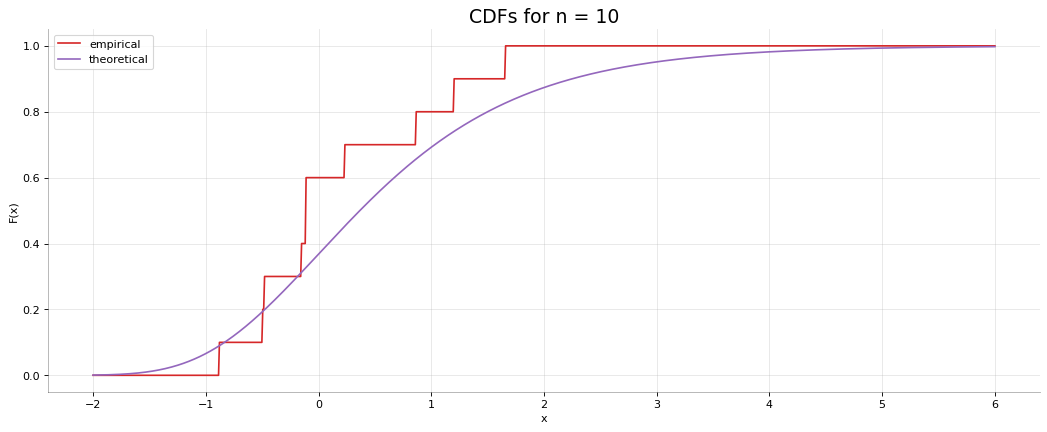

<Figure size 432x288 with 0 Axes>

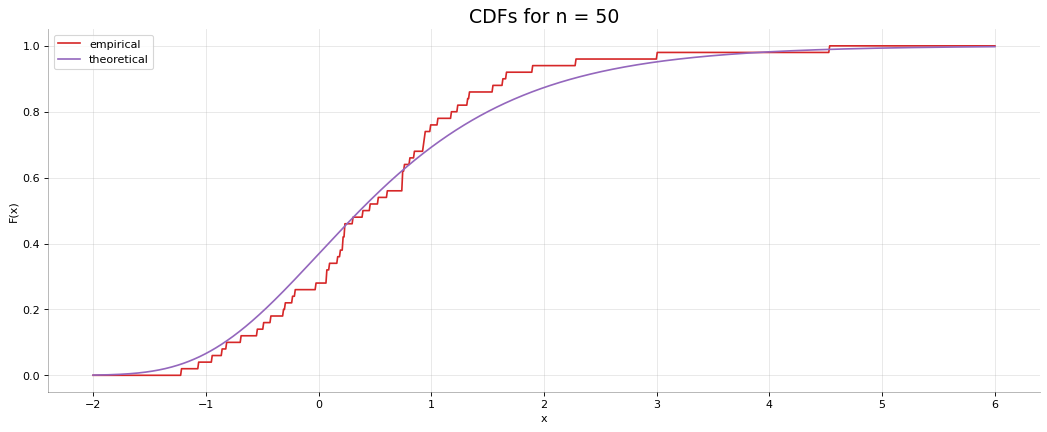

<Figure size 432x288 with 0 Axes>

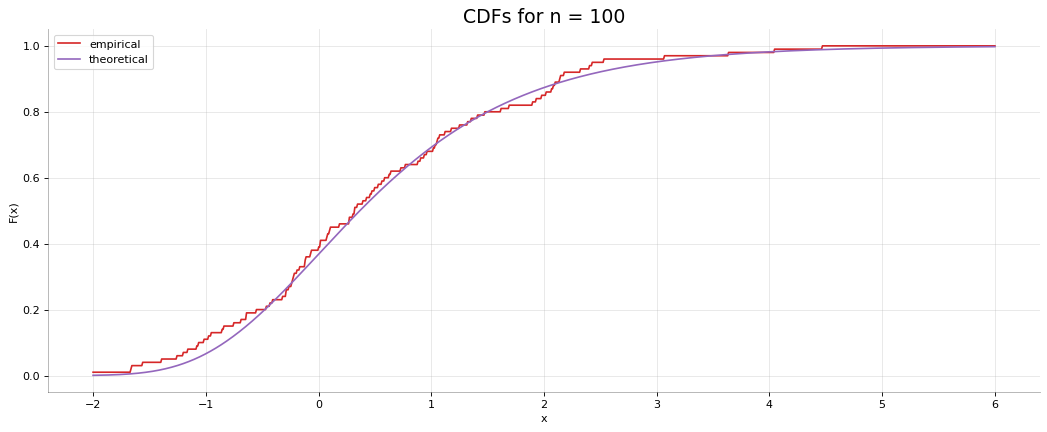

<Figure size 432x288 with 0 Axes>

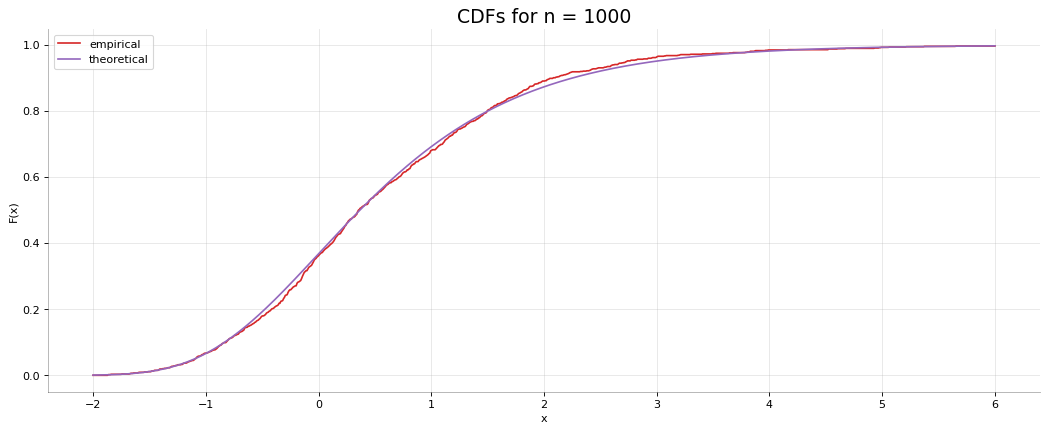

<Figure size 432x288 with 0 Axes>

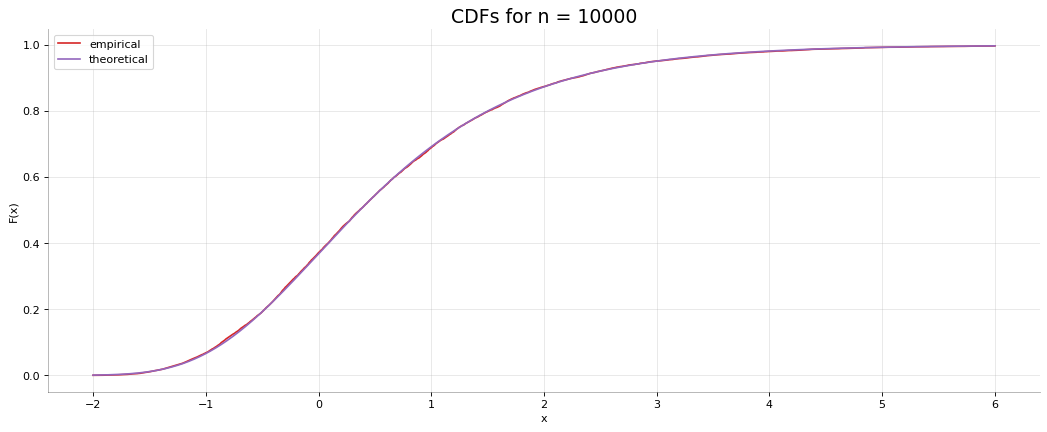

In [25]:
a = 12 # Параметр экспоненциального распределения
n = 100 
k = 1000
x = np.linspace(-2, 6, 1000)

for i in [10, 50, 100, 1000, 10000]:
    data = expon.rvs(scale = 1/a, size = (i, k))
    transformed = data.max(axis=1) *  a - np.log(k)
    
    y = ecdf(transformed)(x)
    y1 = cdf(x)
    plot(f"CDFs for n = {i}", y = y, y1=y1, x = x, xlabel="x", ylabel="F(x)", 
         label1="empirical", label2="theoretical")

<Figure size 432x288 with 0 Axes>

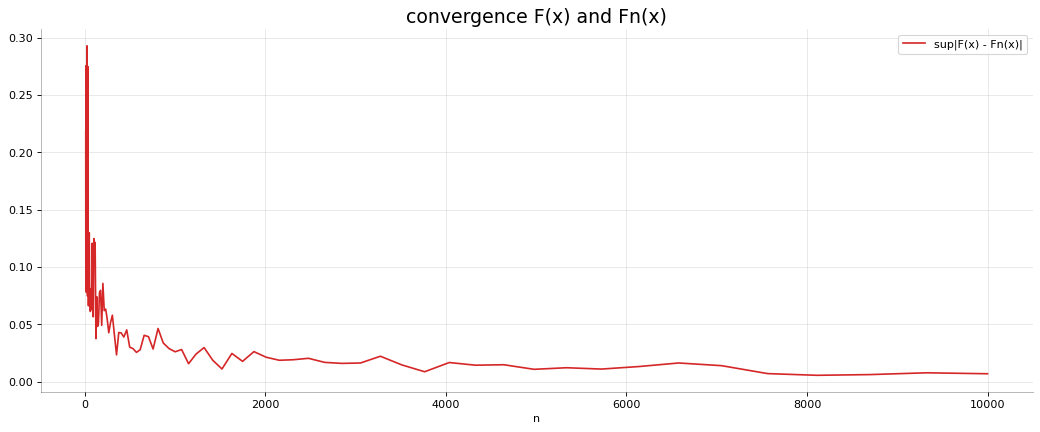

In [26]:
n = np.logspace(1, 4, num=100, dtype=int)
x = np.linspace(-2, 6, 1000)
convergence = []

for i in tqdm.tqdm(n):
    data = expon.rvs(scale = 1/a, size = (i, k))
    transformed = data.max(axis=1) *  a - np.log(k)
    y = ecdf(transformed)(transformed)
    y1 = cdf(transformed)
    
    convergence.append(abs(y - y1).max())

plot(f"convergence F(x) and Fn(x)", y = convergence, x = n, xlabel="n", label1="sup|F(x) - Fn(x)|")
    